### Ejercicio independiete #3

Cargar una imagen a color. Transformarla a niveles de gris y aplicarle las funciones de cambio de contraste que aparecen en las figuras. Visualizar en una misma imagen, la imagen original, la imagen transformada y sus histogramas.

In [1]:
from pylab import *
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray

In [2]:
def imadjust(F,range_in=(0,1),range_out=(0,1),gamma=1):
    G = (((F - range_in[0]) / (range_in[1] - range_in[0])) ** gamma) * (range_out[1] - range_out[0]) + range_out[0]
    return G

In [3]:
# Cargar imagen
image = imread('../dataset/mandril_color.tif')

In [4]:
# Convertir imagen a escala de grises
image = rgb2gray(image)

In [5]:
# aplicar funciones
negativo = imadjust(image, (0, 1), (1, 0)) # Negativo de la imagen
g2 = imadjust(image, gamma=0.3) 
g3 = imadjust(image, gamma=2) 

In [6]:
# obtener histogramas
hist_image, bins_image = imhist(image)
hist_negativo, bins_negativo = imhist(negativo)
hist_g2, bins_g2 = imhist(g2)
hist_g3, bins_g3 = imhist(g3)

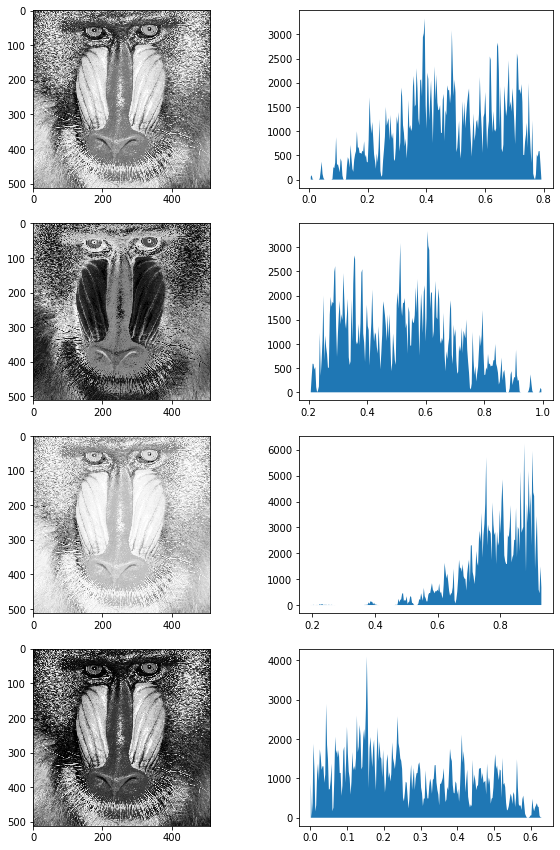

In [7]:
# Visualizar
_, ((image0, hist0), (image1, hist1), (image2, hist2), (image3, hist3)) = subplots(4, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

# Negativo
image1.imshow(negativo, cmap="gray")
hist1.fill_between(bins_negativo, hist_negativo)

# G2
image2.imshow(g2, cmap="gray")
hist2.fill_between(bins_g2, hist_g2)

# G3
image3.imshow(g3, cmap="gray")
hist3.fill_between(bins_g3, hist_g3)